In [1]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nba_shotcharts.shotcharts.shotchart import Shotchart
from nba_shotcharts.shotcharts.data_retriever import DataRetrieverFactory

In [20]:
%matplotlib inline

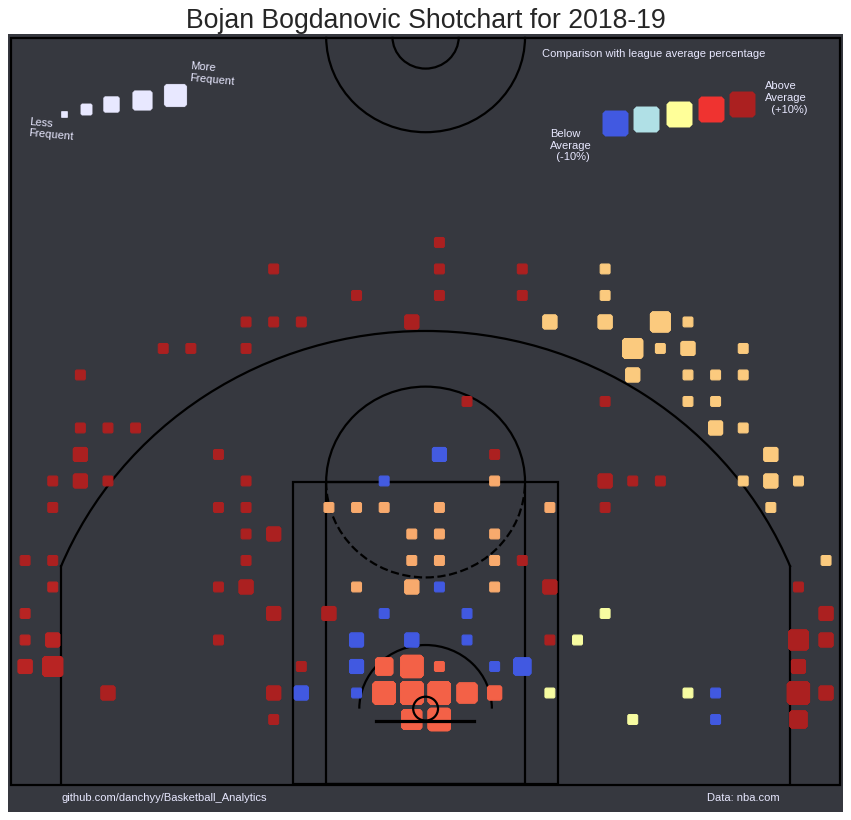

In [32]:
player_name = "Bojan Bogdanovic"
data, league_averages = DataRetrieverFactory.get_shotchart_league_averages(player_name)
shotchart = Shotchart(
    shotchart_data=data,
    league_average_data=league_averages,
    image_size='medium',
    should_save_image='True'
)
shotchart.plot_shotchart(player_name + " Shotchart for 2018-19")

In [6]:
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [9]:
league_dash = LeagueDashPlayerStats()

In [12]:
league_stats = league_dash.get_data_frames()[0]

In [14]:
league_stats.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [93]:
from matplotlib.ticker import FormatStrFormatter

In [17]:
top_50_three_point_shooters = league_stats.sort_values(by="FG3M_RANK").iloc[:50]

In [33]:
plt.style.use('seaborn')

Text(0, 0.5, '3PT percentage')

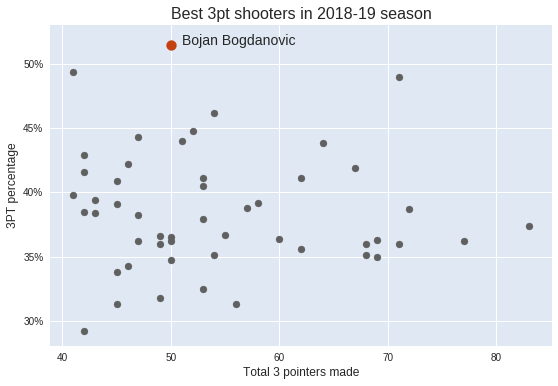

In [98]:
ax = plt.gca()
ax.set_facecolor(color="#E0E9F3")
ax.yaxis.set_major_formatter(FormatStrFormatter("%2.f%%"))

plt.scatter(x=top_50_three_point_shooters.FG3M, y=top_50_three_point_shooters.FG3_PCT * 100, c='#606060')
bojan_stat = top_50_three_point_shooters.loc[top_50_three_point_shooters.PLAYER_NAME == "Bojan Bogdanovic"]
plt.scatter(x=bojan_stat.FG3M, y=bojan_stat.FG3_PCT * 100, c='#C54010', s=100)
plt.text(x=bojan_stat.FG3M + 1, y=bojan_stat.FG3_PCT * 100, s="Bojan Bogdanovic")

plt.title("Best 3pt shooters in 2018-19 season", fontsize=16)
plt.xlabel("Total 3 pointers made", fontsize=12)
plt.ylabel("3PT percentage", fontsize=12)